In [74]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Load experiment data from directories
def load_experiments(experiment_dirs, experiment_names=None):
    """
    Loads experiments and assigns custom names for each experiment.

    Args:
        experiment_dirs (list): List of experiment directories.
        experiment_names (list or None): List of custom names for each experiment.
                                         Defaults to directory names if None.

    Returns:
        list: List of experiments with assigned names.
    """
    experiments = []
    for idx, exp_dir in enumerate(experiment_dirs):
        json_path = os.path.join(exp_dir, f"{os.path.basename(exp_dir)}.json")
        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                experiment = json.load(f)
                experiment["custom_name"] = (
                    experiment_names[idx] if experiment_names else os.path.basename(exp_dir)
                )
                experiments.append(experiment)
        else:
            print(f"Warning: JSON file not found for experiment {exp_dir}")
    return experiments

In [76]:
# Specify experiment directories
experiment_dirs = [
    "Contrast_set_1_randomcontrastnone_2024_12_11_00_25_36",
    "Contrast_set_2_randomcontrastnone_2024_12_11_02_33_28",
   "Contrast_set_3_randomcontrastnone_2024_12_11_10_50_39",
   "Contrast_set_4_randomcontrastnone_2024_12_11_18_05_50",
   "Contrast_set_5_randomcontrastnone_2024_12_11_21_40_01"
]

# Custom names for the experiments
experiment_names = [
    "Contrast Set 1",
    "Contrast Set 2",
    "Contrast Set 3",
    "Contrast Set 4",
    "Contrast Set 5",
]
# Load experiments
experiments = load_experiments(experiment_dirs, experiment_names)

In [77]:
def plot_metric_for_round(experiments, round_number, metric_name):
    """
    Plots the specified metric for a given round across multiple experiments.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The metric to plot (e.g., "accuracy").
    """
    metric_values = []
    experiment_names = []

    for experiment in experiments:
        experiment_name = experiment["custom_name"]
        experiment_names.append(experiment_name)

        round_data = next((result for result in experiment["server_results"] if result["round"] == round_number), None)
        if round_data:
            metric_values.append(round_data["server_metrics"].get(metric_name, None))
        else:
            metric_values.append(None)

    plt.figure(figsize=(10, 6))
    plt.plot(experiment_names, metric_values, marker="o", label=f"{metric_name.capitalize()} for Round {round_number}")
    plt.title(f"{metric_name.capitalize()} Comparison for Round {round_number}")
    plt.xlabel("Experiment")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


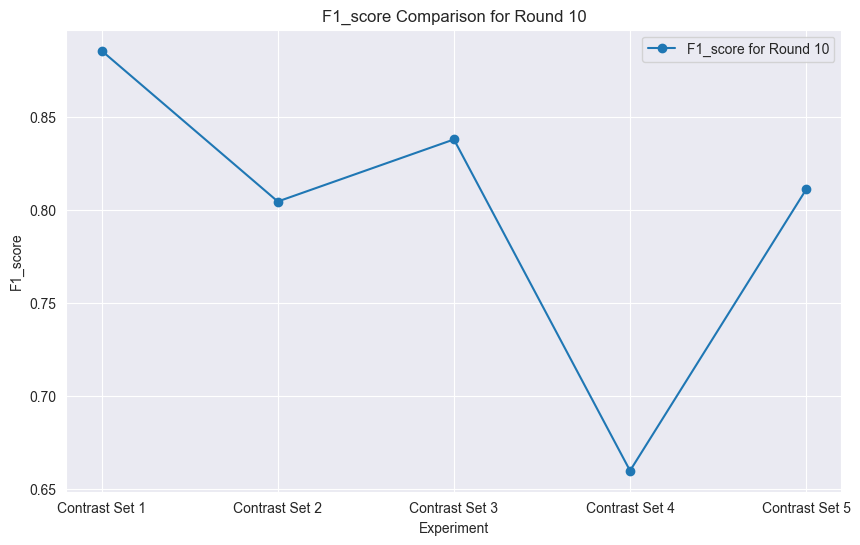

In [82]:
plot_metric_for_round(experiments, 10, "f1_score")

In [28]:
def plot_std_dev_for_round(experiments, round_number, metric_name):
    """
    Plots the standard deviation of the specified metric for a given round across multiple experiments.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The metric to plot (e.g., "accuracy").
    """
    metric_values = []

    for experiment in experiments:
        round_data = next((result for result in experiment["server_results"] if result["round"] == round_number), None)
        if round_data:
            metric_values.append(round_data["server_metrics"].get(metric_name, None))

    std_dev = np.std([val for val in metric_values if val is not None])

    plt.figure(figsize=(10, 6))
    plt.bar(["Std Dev"], [std_dev], color="orange", label=f"Std Dev of {metric_name.capitalize()} for Round {round_number}")
    plt.title(f"Standard Deviation of {metric_name.capitalize()} for Round {round_number}")
    plt.ylabel("Standard Deviation")
    plt.legend()
    plt.grid(True)
    plt.show()



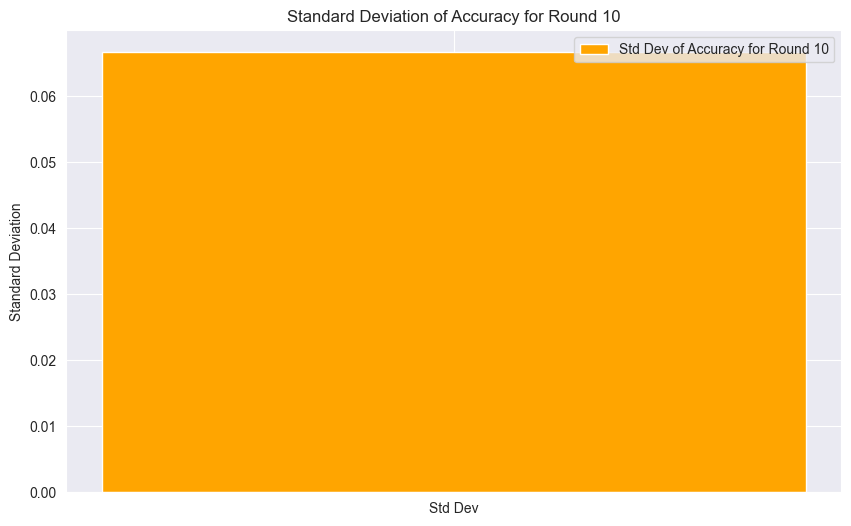

In [30]:
plot_std_dev_for_round(experiments, 10, "accuracy")

In [4]:
# Visualization 1: Metric Trends Across Experiments
def plot_metric_trends(experiments, metric="accuracy"):
    experiment_ids = [exp["config"]["experiment_name"] for exp in experiments]
    avg_metrics = []

    for exp in experiments:
        server_results = exp["server_results"]
        avg_metric = sum([round_data["server_metrics"][metric] for round_data in server_results]) / len(server_results)
        print(avg_metric)
        avg_metrics.append(avg_metric)

    plt.figure(figsize=(10, 6))
    plt.plot(experiment_ids, avg_metrics, marker="o")
    plt.title(f"{metric.capitalize()} Across Experiments")
    plt.xlabel("Experiment ID")
    plt.ylabel(f"Average {metric.capitalize()}")
    plt.xticks(experiment_ids)
    plt.grid(True)
    plt.show()

Plotting Metric Trends...
0.7245312746179298
0.6939971640144951
0.7190168583582796
0.6545139435953994
0.7454860564046005


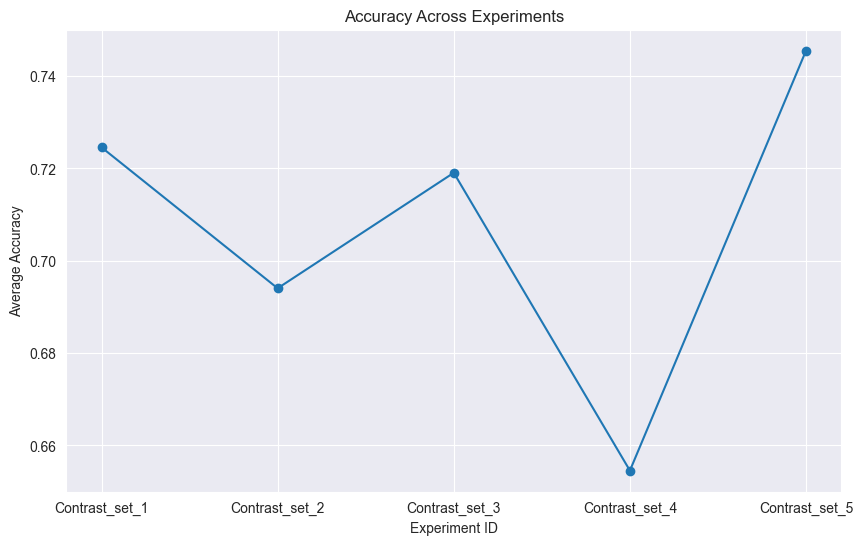

In [5]:
print("Plotting Metric Trends...")
plot_metric_trends(experiments, metric="accuracy")

In [6]:
# Visualization 2: Configuration Impact on Metrics
def plot_configuration_impact(experiments, metric="accuracy"):
    configs = [exp["config"] for exp in experiments]
    avg_metrics = []

    for exp in experiments:
        server_results = exp["server_results"]
        avg_metric = sum([round_data["server_metrics"][metric] for round_data in server_results]) / len(server_results)
        avg_metrics.append(avg_metric)

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(experiments) + 1), avg_metrics)
    plt.title(f"Configuration Impact on {metric.capitalize()}")
    plt.xlabel("Experiment ID")
    plt.ylabel(f"Average {metric.capitalize()}")
    plt.grid(True)
    plt.show()

Plotting Configuration Impact...


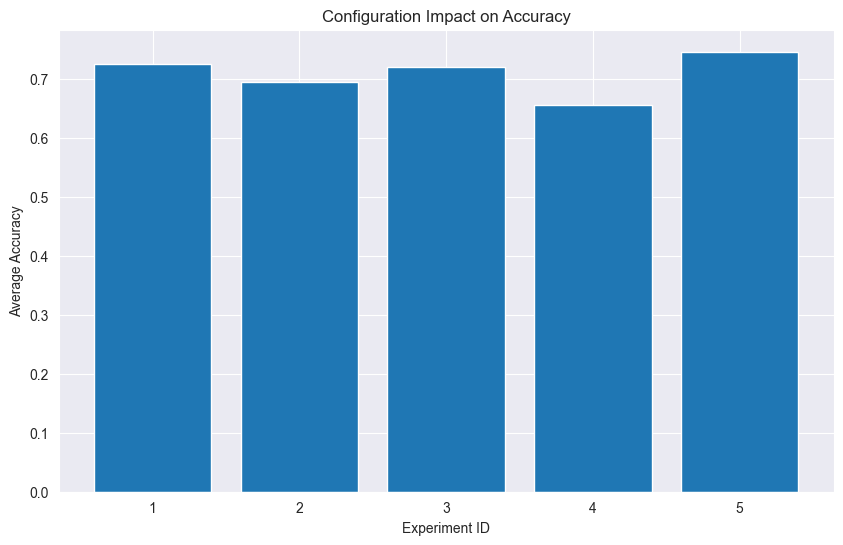

In [7]:
print("Plotting Configuration Impact...")
plot_configuration_impact(experiments, metric="accuracy")

In [8]:
# Visualization 3: Metric Distributions Across Experiments
def plot_metric_distributions(experiments, metric="accuracy"):
    distributions = []

    for exp in experiments:
        server_results = exp["server_results"]
        round_metrics = [round_data["server_metrics"][metric] for round_data in server_results]
        distributions.append(round_metrics)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=distributions)
    plt.title(f"{metric.capitalize()} Distributions Across Experiments")
    plt.xlabel("Experiment")
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()

Plotting Metric Distributions...


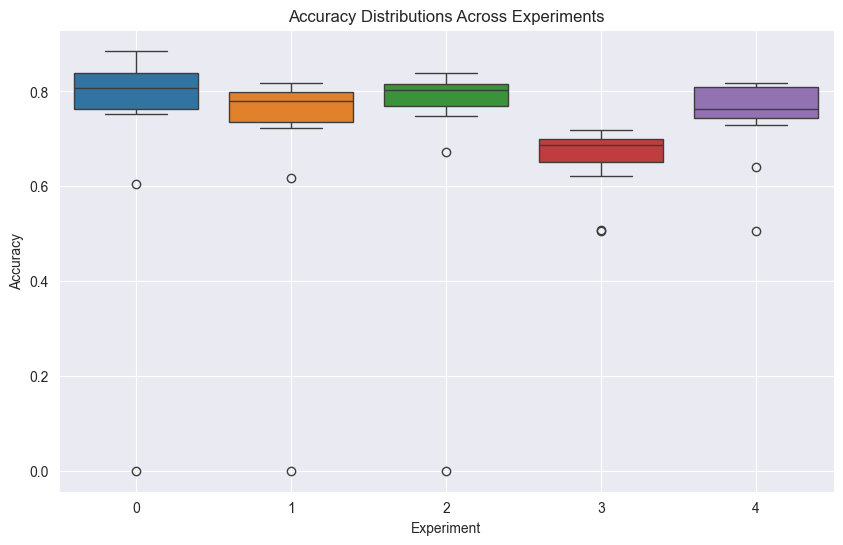

In [9]:
print("Plotting Metric Distributions...")
plot_metric_distributions(experiments, metric="accuracy")

In [10]:
# Visualization 4: Heatmap of Configuration vs. Performance
def plot_configuration_heatmap(experiments, metrics=None):
    """
    Plot a heatmap of configuration vs. performance.

    Args:
        experiments (list): List of experiment JSON data.
        metrics (list): List of metrics to include in the heatmap.
    """
    # Dynamically determine available metrics if not provided
    if metrics is None:
        first_experiment = experiments[0]
        all_metrics = list(first_experiment["server_results"][0]["server_metrics"].keys())
        
         # Filter out non-scalar metrics
        metrics = [m for m in all_metrics if isinstance(first_experiment["server_results"][0]["server_metrics"][m], (int, float))]
        # Remove 'loss' if present
        # if "loss" in metrics:
        #     metrics.remove("loss")

    # Prepare heatmap data
    heatmap_data = []
    for exp in experiments:
        row = []
        for metric in metrics:
            server_results = exp["server_results"]
            avg_metric = sum([round_data["server_metrics"][metric] for round_data in server_results]) / len(server_results)
            row.append(avg_metric)
        heatmap_data.append(row)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data,
        annot=True,
        xticklabels=metrics,
        yticklabels=[f"Exp {i}" for i in range(1, len(experiments) + 1)],
        cmap="coolwarm"
    )
    plt.title("Configuration vs. Performance Heatmap")
    plt.xlabel("Metric")
    plt.ylabel("Experiment")
    plt.tight_layout()
    plt.show()

Plotting Configuration vs. Performance Heatmap...


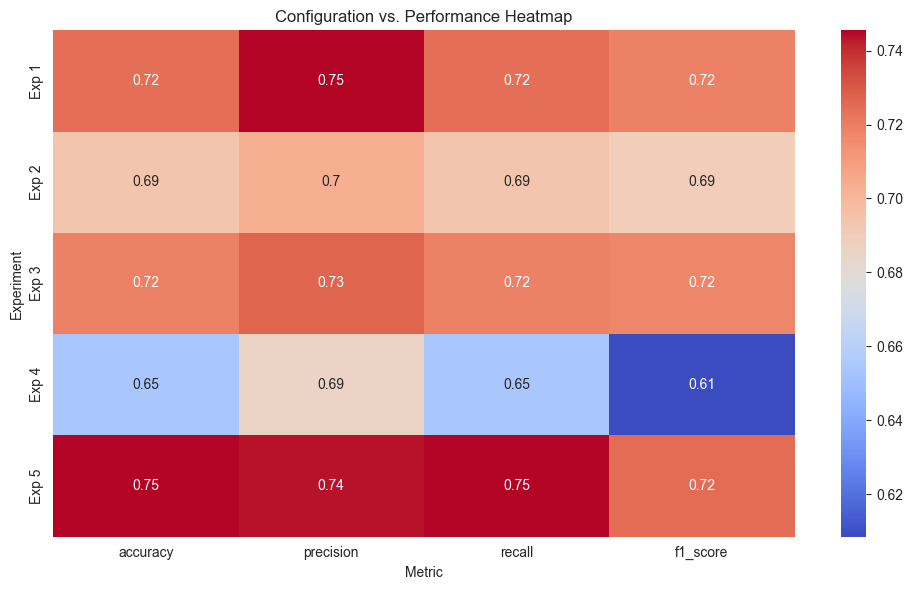

In [11]:
print("Plotting Configuration vs. Performance Heatmap...")
plot_configuration_heatmap(experiments)

In [12]:
#  Comparison of Rounds Across Experiments
def plot_round_comparison(experiments, metric="accuracy"):
    for exp_idx, exp in enumerate(experiments):
        rounds = [result["round"] for result in exp["server_results"]]
        round_metrics = [result["server_metrics"][metric] for result in exp["server_results"]]
        
        plt.plot(rounds, round_metrics, label=f"Experiment {exp_idx + 1}")
    
    plt.title(f"{metric.capitalize()} Over Rounds Across Experiments")
    plt.xlabel("Round")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

Comparison of Rounds Across Experiments


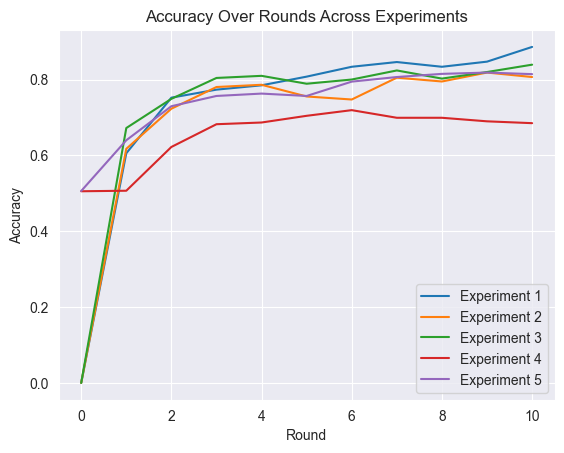

In [13]:
print("Comparison of Rounds Across Experiments")
plot_round_comparison(experiments)

In [14]:
# Client-Specific Performance Trends
def plot_client_performance(experiments, metric="accuracy"):
    for exp_idx, exp in enumerate(experiments):
        client_metrics = []
        for round_num, clients in exp["client_results"].items():
            round_avg = [
                client_data[metric] for client_data in clients.values()
            ]
            client_metrics.append(sum(round_avg) / len(round_avg))
        
        plt.plot(range(1, len(client_metrics) + 1), client_metrics, label=f"Experiment {exp_idx + 1}")
    
    plt.title(f"Client {metric.capitalize()} Trends Across Experiments")
    plt.xlabel("Round")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

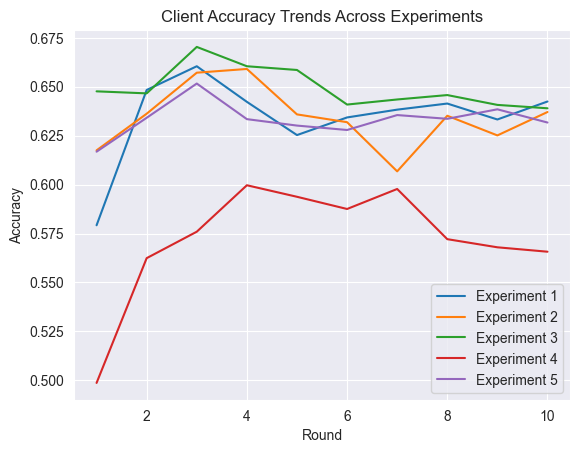

In [15]:
plot_client_performance(experiments, metric="accuracy")

In [16]:
# Pairwise Experiment Comparison
def compare_experiments(experiment1, experiment2, metric="accuracy"):
    exp1_metrics = [
        result["server_metrics"][metric] for result in experiment1["server_results"]
    ]
    exp2_metrics = [
        result["server_metrics"][metric] for result in experiment2["server_results"]
    ]
    
    plt.scatter(exp1_metrics, exp2_metrics)
    plt.title(f"Pairwise Comparison of {metric.capitalize()}")
    plt.xlabel("Experiment 1")
    plt.ylabel("Experiment 2")
    plt.grid(True)
    plt.show()

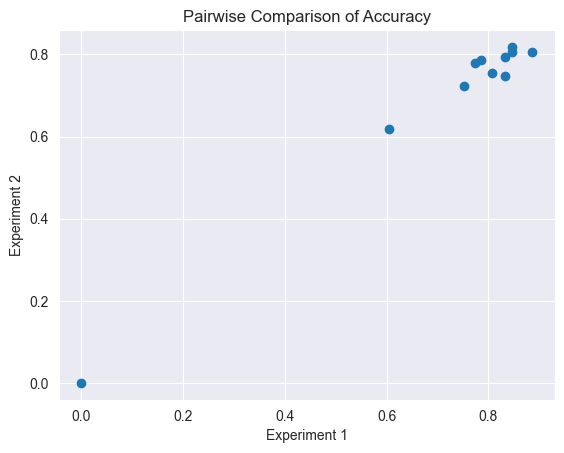

In [17]:
compare_experiments(experiments[0], experiments[1], metric="accuracy")

In [78]:
# def generate_summary_report(experiments, metrics=["accuracy", "loss"]):
#     summary = []
#     for exp_idx, exp in enumerate(experiments):
#         row = {"Experiment": exp_idx + 1}
#         for metric in metrics:
#             avg_metric = sum(
#                 [result["server_metrics"][metric] for result in exp["server_results"]]
#             ) / len(exp["server_results"])
#             row[metric] = avg_metric
#         row.update(exp["config"])  # Add configuration details
#         summary.append(row)
#     
#     df = pd.DataFrame(summary)
#     df.to_csv("experiment_summary.csv", index=False)
#     print(df)

In [13]:
def plot_metric_for_round(experiments, round_number, metric_name):
    """
    Plots the specified metric for a given round across multiple experiments.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The metric to plot (e.g., "accuracy").
    """
    metric_values = []
    experiment_names = []

    for experiment in experiments:
        experiment_name = experiment["config"]["experiment_name"]
        experiment_names.append(experiment_name)

        round_data = next((result for result in experiment["server_results"] if result["round"] == round_number), None)
        if round_data:
            metric_values.append(round_data["server_metrics"].get(metric_name, None))
        else:
            metric_values.append(None)

    plt.figure(figsize=(10, 6))
    plt.plot(experiment_names, metric_values, marker="o", label=f"{metric_name.capitalize()} for Round {round_number}")
    plt.title(f"{metric_name.capitalize()} Comparison for Round {round_number}")
    plt.xlabel("Experiment")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

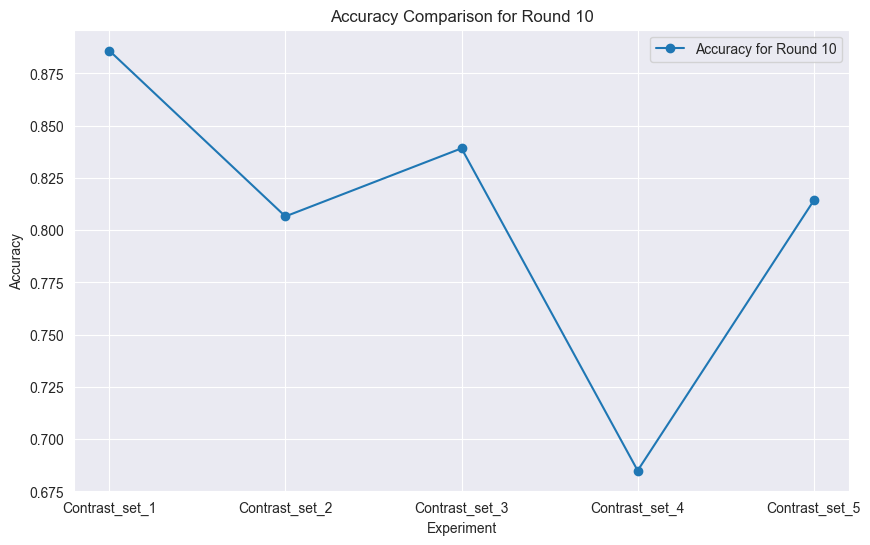

In [14]:
plot_metric_for_round(experiments, 10, "accuracy")

In [41]:
def plot_client_std_dev_for_round(experiments, round_number, metric_name):
    """
    Plots the standard deviation of a specified metric for clients in each experiment for a given round.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The client metric to calculate standard deviation for (e.g., "accuracy").
    """
    experiment_names = []
    std_dev_values = []

    for experiment in experiments:
        experiment_name = experiment["custom_name"] if "custom_name" in experiment else experiment["config"]["experiment_name"]
        experiment_names.append(experiment_name)

        round_data = experiment["client_results"].get(str(round_number), {})
        client_metrics = [
            client_data.get(metric_name, None)
            for client_data in round_data.values()
            if metric_name in client_data
        ]

        if client_metrics:
            std_dev_values.append(np.std(client_metrics))
        else:
            std_dev_values.append(0)  # Append 0 if no metrics are available for the round

    # Plotting the standard deviation values
    plt.figure(figsize=(12, 6))
    plt.bar(experiment_names, std_dev_values, color="skyblue", label=f"Std Dev of {metric_name.capitalize()}")
    plt.title(f"Standard Deviation of {metric_name.capitalize()} for Round {round_number}")
    plt.xlabel("Experiment")
    plt.ylabel("Standard Deviation")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    # plt.show()

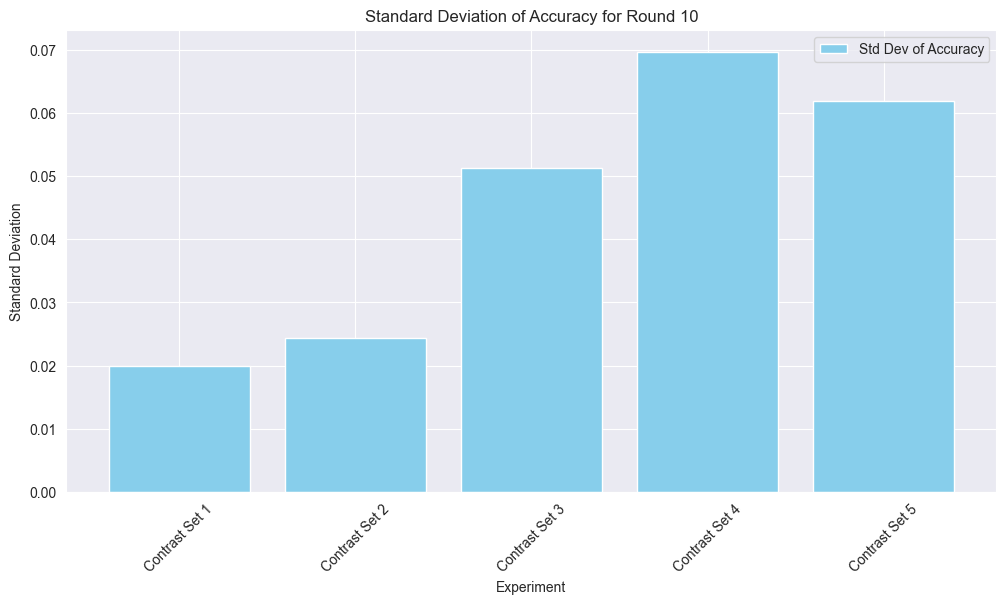

In [42]:
plot_client_std_dev_for_round(experiments, 10, "accuracy")

In [28]:
def plot_client_mean_std_dev_for_round(experiments, round_number, metric_name):
    """
    Plots the mean standard deviation of a specified metric for clients in each experiment for a given round.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The client metric to calculate mean standard deviation for (e.g., "accuracy").
    """
    experiment_names = []
    mean_std_dev_values = []

    for experiment in experiments:
        experiment_name = experiment["custom_name"] if "custom_name" in experiment else experiment["config"]["experiment_name"]
        experiment_names.append(experiment_name)

        round_data = experiment["client_results"].get(str(round_number), {})
        client_metrics = [
            client_data.get(metric_name, None)
            for client_data in round_data.values()
            if metric_name in client_data
        ]

        if client_metrics:
            mean_std_dev_values.append(np.mean(client_metrics))  # Compute mean across clients
        else:
            mean_std_dev_values.append(0)  # Append 0 if no metrics are available for the round

    # Plotting the mean standard deviation values
    plt.figure(figsize=(12, 6))
    plt.bar(experiment_names, mean_std_dev_values, color="lightgreen", label=f"Mean of {metric_name.capitalize()}")
    plt.title(f"Mean of {metric_name.capitalize()} Across Clients for Round {round_number}")
    plt.xlabel("Experiment")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

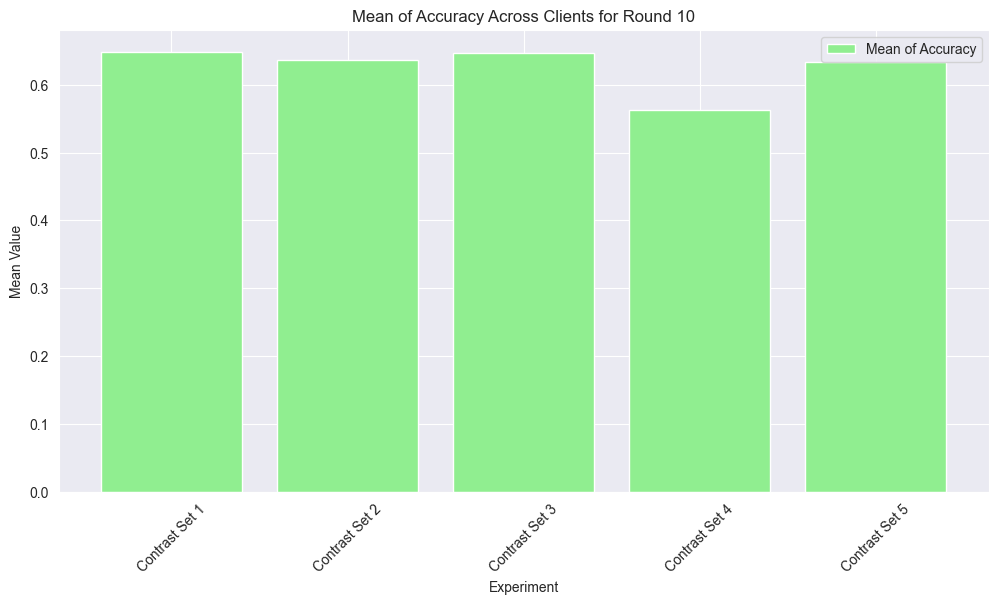

In [29]:
plot_client_mean_std_dev_for_round(experiments, 10, "accuracy")

In [36]:
def plot_client_mean_with_std_dev(experiments, round_number, metric_name):
    """
    Plots a bar chart showing the mean and standard deviation of a specified metric
    for clients across experiments for a given round.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The client metric to calculate mean and standard deviation for (e.g., "accuracy").
    """
    experiment_names = []
    all_client_metrics = []

    for experiment in experiments:
        experiment_name = experiment["custom_name"] if "custom_name" in experiment else experiment["config"]["experiment_name"]
        
        round_data = experiment["client_results"].get(str(round_number), {})
        client_metrics = [
            client_data.get(metric_name, None)
            for client_data in round_data.values()
            if metric_name in client_data
        ]
        
        if client_metrics:
            experiment_names.extend([experiment_name] * len(client_metrics))
            all_client_metrics.extend(client_metrics)

    # Combine data into a DataFrame for seaborn
    data = pd.DataFrame({
        "Experiment": experiment_names,
        metric_name.capitalize(): all_client_metrics
    })

    # Calculate mean for each experiment
    means = data.groupby("Experiment")[metric_name.capitalize()].mean()

    # Create a box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x="Experiment", y=metric_name.capitalize(), palette="Set2", width=0.6, fliersize=5)

    # Add mean values as scatter points
    for i, mean in enumerate(means):
        plt.scatter(i, mean, color="red", marker="o", label="Mean" if i == 0 else "")

    plt.title(f"{metric_name.capitalize()} Distribution with Means Across Experiments (Round {round_number})")
    plt.xlabel("Experiment")
    plt.ylabel(metric_name.capitalize())
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

C:\Users\Shuvanon\AppData\Local\Temp\ipykernel_16428\3038637749.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Experiment", y=metric_name.capitalize(), palette="Set2", width=0.6, fliersize=5)


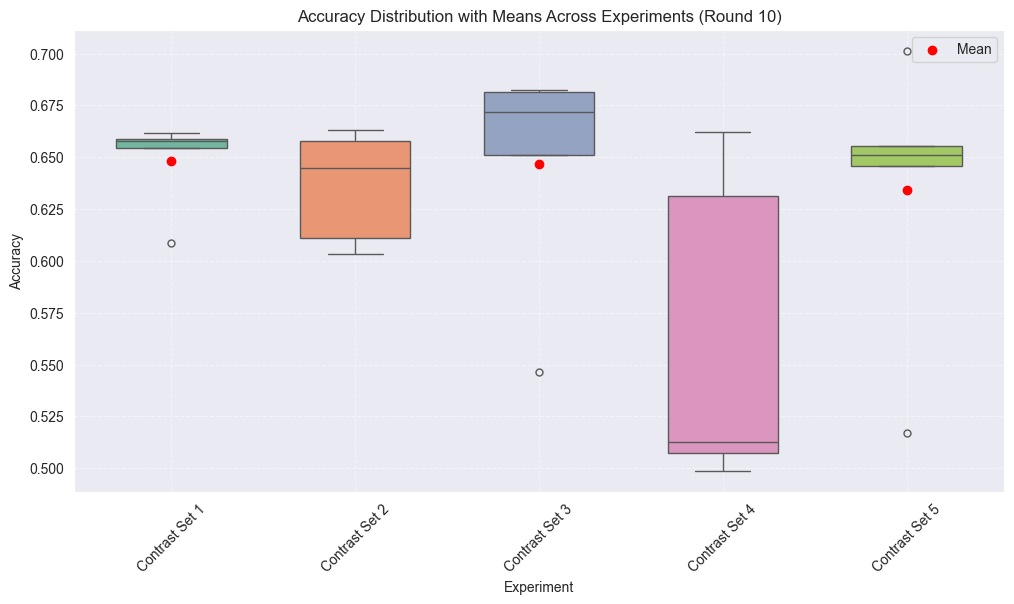

In [38]:
plot_client_mean_with_std_dev(experiments, 10, "accuracy")

In [43]:
def plot_client_mean_with_std_dev_line(experiments, round_number, metric_name):
    """
    Plots the mean and standard deviation of a specified metric for clients in each experiment for a given round
    using a line plot with shaded areas.

    Args:
        experiments (list): List of loaded experiment data.
        round_number (int): The round number to analyze.
        metric_name (str): The client metric to calculate mean and standard deviation for (e.g., "accuracy").
    """
    experiment_names = []
    mean_values = []
    std_dev_values = []

    for experiment in experiments:
        experiment_name =  experiment["custom_name"]
        experiment_names.append(experiment_name)

        round_data = experiment["client_results"].get(str(round_number), {})
        client_metrics = [
            client_data.get(metric_name, None)
            for client_data in round_data.values()
            if metric_name in client_data
        ]

        if client_metrics:
            mean_values.append(np.mean(client_metrics))
            std_dev_values.append(np.std(client_metrics))
        else:
            mean_values.append(None)
            std_dev_values.append(None)

    x = range(len(experiment_names))  # Numerical indices for experiments

    plt.figure(figsize=(12, 6))
    plt.plot(x, mean_values, marker="o", label=f"Mean {metric_name.capitalize()}", color="blue")
    plt.fill_between(
        x,
        [m - s if m is not None and s is not None else None for m, s in zip(mean_values, std_dev_values)],
        [m + s if m is not None and s is not None else None for m, s in zip(mean_values, std_dev_values)],
        color="blue",
        alpha=0.2,
        label="Std Dev",
    )
    plt.xticks(x, experiment_names, rotation=45)
    plt.title(f"Mean and Standard Deviation of Client {metric_name.capitalize()} for Round {round_number}")
    plt.xlabel("Experiment")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

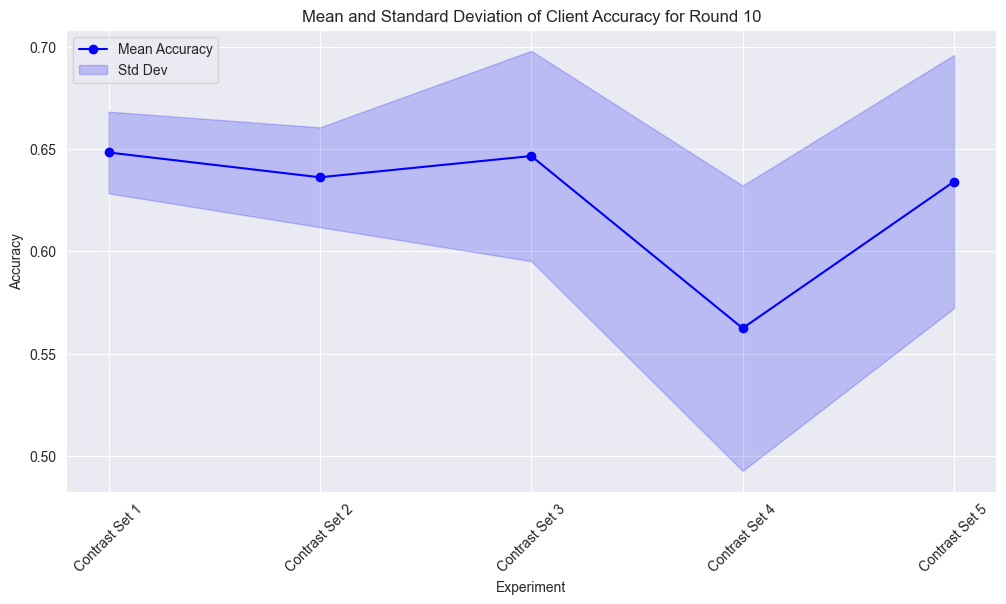

In [45]:
plot_client_mean_with_std_dev_line(experiments, 10, "accuracy")

In [57]:
def plot_metric_trend_with_std_dev(experiments, metric_name, client_or_server="server"):
    """
    Plots a line chart showing the mean metric values across rounds with shaded areas representing standard deviation.

    Args:
        experiments (list): List of loaded experiment data.
        metric_name (str): The metric to plot (e.g., "accuracy").
        client_or_server (str): Indicates whether to use "client" or "server" results.
                               Defaults to "server".
    """
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10.colors  # Use a colormap for consistent colors

    for i, experiment in enumerate(experiments):
        experiment_name = experiment["custom_name"] if "custom_name" in experiment else experiment["config"]["experiment_name"]
        rounds = []
        mean_values = []
        std_dev_values = []

        if client_or_server == "server":
            for result in experiment["server_results"]:
                rounds.append(result["round"])
                metric_value = result["server_metrics"].get(metric_name, None)
                if metric_value is not None:
                    mean_values.append(metric_value)
                    std_dev_values.append(0)  # Server doesn't have client-level std dev

        elif client_or_server == "client":
            for round_number, client_results in experiment["client_results"].items():
                client_metrics = [
                    client_data.get(metric_name, None)
                    for client_data in client_results.values()
                    if metric_name in client_data
                ]
                if client_metrics:
                    rounds.append(int(round_number))
                    mean_values.append(np.mean(client_metrics))
                    std_dev_values.append(np.std(client_metrics))

        # Plot the line and shaded area
        plt.plot(rounds, mean_values, label=experiment_name, color=colors[i % len(colors)], marker="o")
        plt.fill_between(
            rounds,
            np.array(mean_values) - np.array(std_dev_values),
            np.array(mean_values) + np.array(std_dev_values),
            color=colors[i % len(colors)],
            alpha=0.2,
        )

    plt.title(f"{metric_name.capitalize()} Trends with Standard Deviation Across Experiments")
    plt.xlabel("Round Number")
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

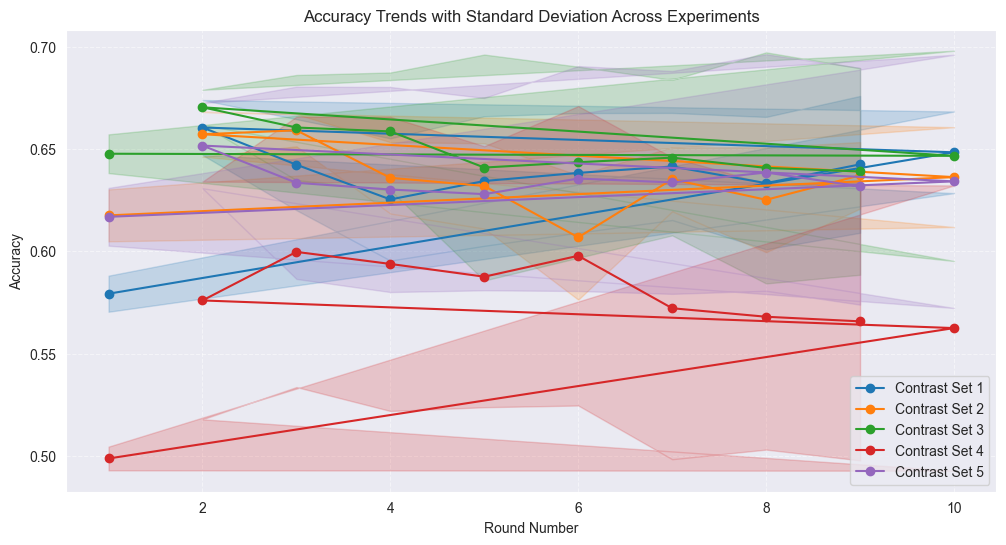

In [59]:
plot_metric_trend_with_std_dev(experiments, "accuracy", client_or_server="client")

In [54]:
def plot_mean_client_metric_trend_with_std_dev(experiments, metric_name):
    """
    Plots a line chart showing the mean of client metric values across rounds with shaded areas representing the standard deviation.

    Args:
        experiments (list): List of loaded experiment data.
        metric_name (str): The client metric to plot (e.g., "accuracy").
    """
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10.colors  # Use a colormap for consistent colors

    for i, experiment in enumerate(experiments):
        # Extract the custom name or default to config name
        experiment_name = experiment["custom_name"] if "custom_name" in experiment else experiment["config"]["experiment_name"]

        # Initialize arrays for rounds, mean values, and std dev values
        rounds = []
        mean_values = []
        std_dev_values = []

        # Iterate through client results for each round
        for round_number, client_results in experiment["client_results"].items():
            # Collect client metrics for the given round
            client_metrics = [
                client_data.get(metric_name, None)
                for client_data in client_results.values()
                if metric_name in client_data
            ]

            if client_metrics:
                rounds.append(int(round_number))
                mean_values.append(np.mean(client_metrics))  # Mean of client metrics
                std_dev_values.append(np.std(client_metrics))  # Standard deviation of client metrics

        # Plot the line for the mean values
        plt.plot(
            rounds,
            mean_values,
            label=experiment_name,
            color=colors[i % len(colors)],
            marker="o",
        )

        # Add the shaded area for standard deviation
        plt.fill_between(
            rounds,
            np.array(mean_values) - np.array(std_dev_values),
            np.array(mean_values) + np.array(std_dev_values),
            color=colors[i % len(colors)],
            alpha=0.2,
        )

    # Add title, labels, and legend
    plt.title(f"{metric_name.capitalize()} Trends with Mean and Standard Deviation Across Experiments")
    plt.xlabel("Round Number")
    plt.ylabel(f"Mean {metric_name.capitalize()} Across Clients")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


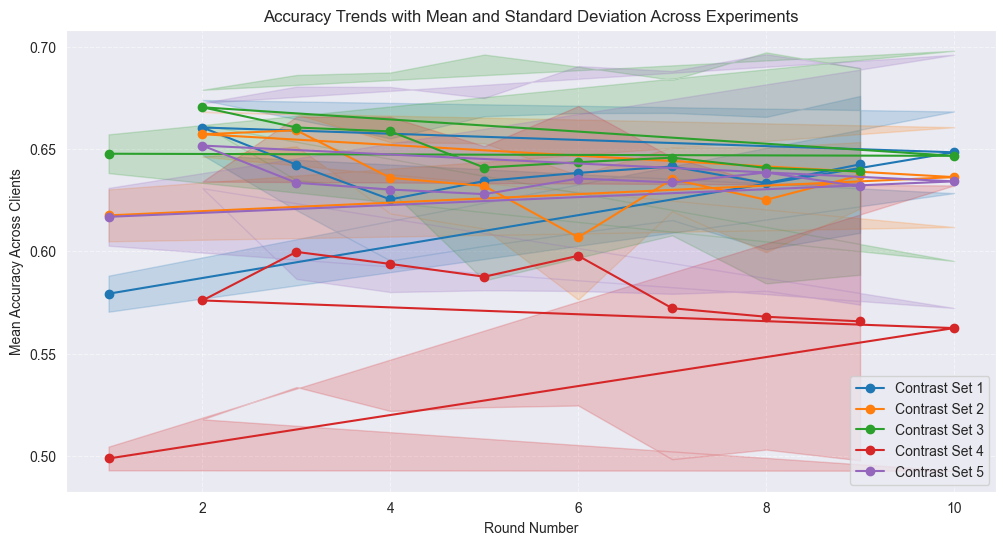

In [56]:
plot_mean_client_metric_trend_with_std_dev(experiments, "accuracy")

In [70]:
def plot_metric_trend_with_std_dev(experiments, metric_name, client_or_server="server"):
    """
    Plots a line chart showing the mean metric values across rounds with shaded areas representing standard deviation.

    Args:
        experiments (list): List of loaded experiment data.
        metric_name (str): The metric to plot (e.g., "accuracy").
        client_or_server (str): Indicates whether to use "client" or "server" results.
                               Defaults to "server".
    """
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab10.colors  # Use a colormap for consistent colors

    for i, experiment in enumerate(experiments):
        experiment_name = experiment.get("custom_name", experiment["config"]["experiment_name"])
        rounds = []
        mean_values = []
        std_dev_values = []

        if client_or_server == "server":
            # Use server metrics for mean value
            for result in experiment["server_results"]:
                round_number = result["round"]
                rounds.append(round_number)
                mean_values.append(result["server_metrics"].get(metric_name, 0))  # Server metric for the round
                std_dev_values.append(0)  # No std dev for server-level metrics

        elif client_or_server == "client":
            # Use client metrics for mean and std dev
            for round_number, client_results in experiment["client_results"].items():
                round_number = int(round_number)
                client_metrics = [
                    client_data.get(metric_name, None)
                    for client_data in client_results.values()
                    if metric_name in client_data
                ]
                if client_metrics:
                    rounds.append(round_number)
                    mean_values.append(np.mean(client_metrics))  # Mean of client metrics
                    std_dev_values.append(np.std(client_metrics))  # Std dev of client metrics

        else:
            raise ValueError("Invalid value for client_or_server. Use 'server' or 'client'.")

        # Ensure data is sorted by round
        sorted_indices = np.argsort(rounds)
        rounds = np.array(rounds)[sorted_indices]
        mean_values = np.array(mean_values)[sorted_indices]
        std_dev_values = np.array(std_dev_values)[sorted_indices]

        # Plot the line and shaded area
        plt.plot(
            rounds,
            mean_values,
            label=experiment_name,
            color=colors[i % len(colors)],
            marker="o",
        )
        plt.fill_between(
            rounds,
            mean_values - std_dev_values,
            mean_values + std_dev_values,
            color=colors[i % len(colors)],
            alpha=0.2,
        )

    plt.title(f"{metric_name.capitalize()} Trends with Mean and Standard Deviation Across Experiments")
    plt.xlabel("Round Number")
    plt.ylabel(f"{metric_name.capitalize()} Value")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


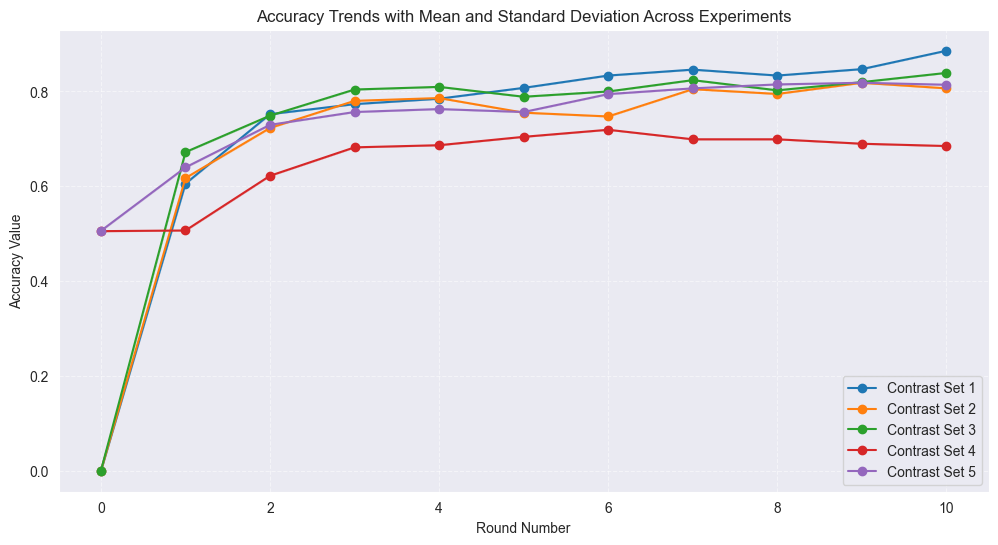

In [73]:
plot_metric_trend_with_std_dev(experiments, "accuracy", client_or_server="server")

In [86]:
def plot_performance_consistency(experiments, metric_name, client_or_server="server"):
    """
    Plots a scatter plot comparing mean and standard deviation of a metric across rounds for each experiment.

    Args:
        experiments (list): List of loaded experiment data.
        metric_name (str): The metric to analyze (e.g., "accuracy").
        client_or_server (str): Indicates whether to use "client" or "server" results.
                               Defaults to "server".
    """
    experiment_names = []
    mean_values = []
    std_dev_values = []

    for experiment in experiments:
        experiment_name = experiment["config"]["experiment_name"]
        experiment_names.append(experiment_name)

        metrics = []

        if client_or_server == "server":
            for result in experiment["server_results"]:
                metric_value = result["server_metrics"].get(metric_name, None)
                if metric_value is not None:
                    metrics.append(metric_value)

        elif client_or_server == "client":
            for round_number, client_results in experiment["client_results"].items():
                round_metrics = [
                    client_data.get(metric_name, None)
                    for client_data in client_results.values()
                    if metric_name in client_data
                ]
                if round_metrics:
                    metrics.append(np.mean(round_metrics))
        print(metrics)
        mean_values.append(np.mean(metrics))
        std_dev_values.append(np.std(metrics))

    plt.figure(figsize=(10, 6))
    plt.scatter(mean_values, std_dev_values, color="orange", s=100, alpha=0.7)

    for i, name in enumerate(experiment_names):
        plt.text(mean_values[i], std_dev_values[i], name, fontsize=9, ha="right")

    plt.title(f"Performance Consistency: {metric_name.capitalize()}")
    plt.xlabel("Mean Value Across Rounds")
    plt.ylabel("Standard Deviation Across Rounds")
    plt.grid(True)
    plt.show()


[0.5792207792207793, 0.6483116883116884, 0.6604329004329004, 0.6422510822510823, 0.6252813852813853, 0.6342857142857142, 0.6382683982683982, 0.6413852813852813, 0.6332467532467533, 0.6424242424242423]
[0.6174891774891774, 0.6361904761904762, 0.6571428571428571, 0.659047619047619, 0.6358441558441559, 0.6318614718614719, 0.6067532467532467, 0.6351515151515151, 0.6251082251082252, 0.6370562770562771]
[0.6476190476190476, 0.6465800865800866, 0.6703030303030303, 0.6604329004329005, 0.6585281385281385, 0.6408658008658009, 0.6434632034632035, 0.6457142857142857, 0.6406926406926406, 0.638961038961039]
[0.4987012987012987, 0.5624242424242424, 0.5759307359307358, 0.5996536796536797, 0.5937662337662337, 0.5875324675324676, 0.5977489177489177, 0.572121212121212, 0.5679653679653679, 0.5657142857142856]
[0.6167965367965368, 0.6341125541125542, 0.6516017316017316, 0.6334199134199133, 0.6301298701298701, 0.6278787878787878, 0.6354978354978355, 0.6335930735930735, 0.6384415584415584, 0.6316883116883116

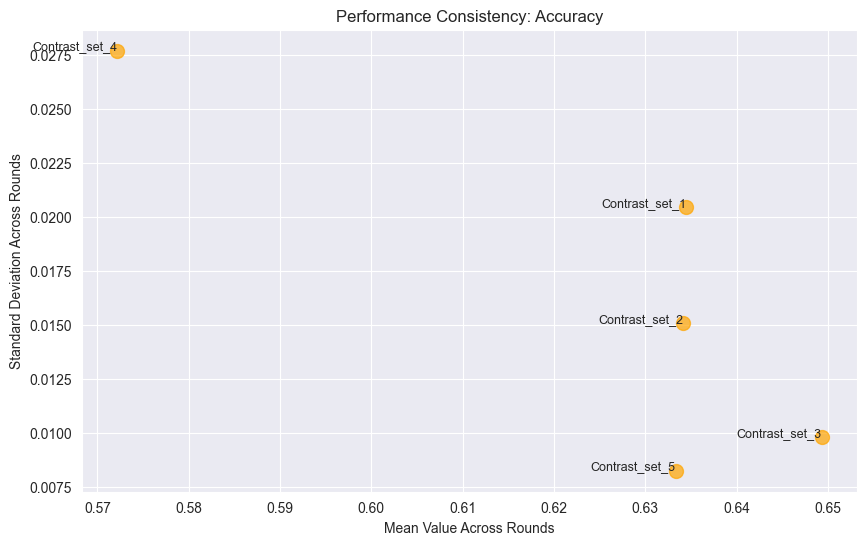

In [87]:
plot_performance_consistency(experiments, "accuracy", client_or_server="client")